Testing set up of Pygimli

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pygimli as pg
from pygimli.viewer.mpl import drawMesh, drawModel

from pygimli.meshtools import polytools as plc
from pygimli.meshtools import quality

import pygimli.meshtools as mt

In [2]:
def create_mesh_and_data(n):
    nc = np.linspace(-2.0, 0.0, n)
    mesh = pg.meshtools.createMesh2D(nc, nc)
    mcx = pg.x(mesh.cellCenter())
    mcy = pg.y(mesh.cellCenter())
    data = np.cos(1.5 * mcx) * np.sin(1.5 * mcy)
    return mesh, data

coarse, coarse_data = create_mesh_and_data(5)
fine, fine_data = create_mesh_and_data(20)

In [3]:
def nearest_neighbor_interpolation(inmesh, indata, outmesh, nan=99.9):
    """ Nearest neighbor interpolation. """
    outdata = []
    for pos in outmesh.cellCenters():
        cell = inmesh.findCell(pos)
        if cell:
            outdata.append(indata[cell.id()])
        else:
            outdata.append(nan)
    return outdata


def linear_interpolation(inmesh, indata, outmesh):
    """ Linear interpolation using `pg.interpolate()` """
    outdata = pg.Vector()  # empty
    pg.interpolate(srcMesh=inmesh, inVec=indata,
                   destPos=outmesh.cellCenters(), outVec=outdata)

    # alternatively you can use the interpolation matrix
    outdata = inmesh.interpolationMatrix(outmesh.cellCenters()) * \
              pg.core.cellDataToPointData(inmesh, indata)
    return outdata

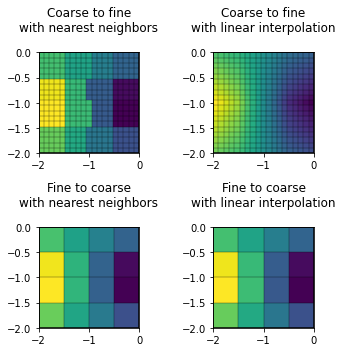

In [4]:
meshes = [coarse, fine]
datasets = [coarse_data, fine_data]
ints = [nearest_neighbor_interpolation,
        linear_interpolation]

fig, ax = plt.subplots(2, 2, figsize=(5, 5))

# Coarse data to fine mesh
drawModel(ax[0, 0], fine, ints[0](coarse, coarse_data, fine), showCbar=False)
drawMesh(ax[0, 0], fine)
drawModel(ax[0, 1], fine, ints[1](coarse, coarse_data, fine), showCbar=False)
drawMesh(ax[0, 1], fine)

# Fine data to coarse mesh
drawModel(ax[1, 0], coarse, ints[0](fine, fine_data, coarse), showCbar=False)
drawMesh(ax[1, 0], coarse)
drawModel(ax[1, 1], coarse, ints[1](fine, fine_data, coarse), showCbar=False)
drawMesh(ax[1, 1], coarse)

titles = ["Coarse to fine\nwith nearest neighbors",
          "Coarse to fine\nwith linear interpolation",
          "Fine to coarse\nwith nearest neighbors",
          "Fine to coarse\nwith linear interpolation"]

for a, title in zip(ax.flat, titles):
    a.set_title(title + "\n")

fig.tight_layout()
plt.show()

17/02/22 - 11:25:49 - pyGIMLi - WARNING - Keyword argument changed from 'cmap' to 'cMap' and will be removed in v 
17/02/22 - 11:25:49 - pyGIMLi - WARNING - Keyword argument changed from 'cmap' to 'cMap' and will be removed in v 
17/02/22 - 11:25:50 - pyGIMLi - WARNING - Keyword argument changed from 'cmap' to 'cMap' and will be removed in v 


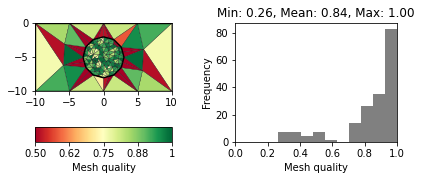

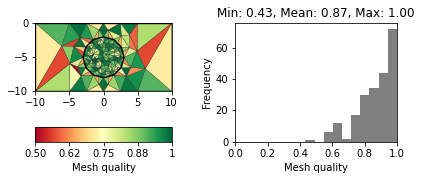

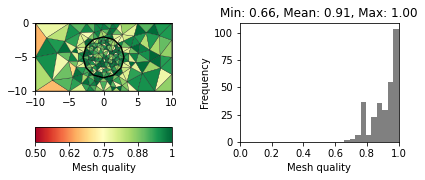

In [5]:
world = plc.createWorld(start=[-10, 0], end=[10, -10], marker=1,
                        worldMarker=False)
c1 = plc.createCircle(pos=[0.0, -5.0], radius=3.0, area=.3)

def showQuality(mesh, qualities):
    fig, axes = plt.subplots(1, 2)
    axes[1].hist(qualities, color="grey")
    pg.show(mesh, qualities, ax=axes[0], cMin=0.5, cMax=1, hold=True,
            logScale=False, label="Mesh quality", cmap="RdYlGn", showMesh=True)
    s = "Min: %.2f, Mean: %.2f, Max: %.2f" % (
        np.min(qualities), np.mean(qualities), np.max(qualities))
    axes[1].set_title(s)
    axes[1].set_xlabel("Mesh quality")
    axes[1].set_ylabel("Frequency")
    axes[1].set_xlim(0, 1)

    # Figure resizing according to mesh dimesions
    x = mesh.xmax() - mesh.xmin()
    y = mesh.ymax() - mesh.ymin()
    width, height = fig.get_size_inches()
    fig.set_figheight(height * 1.3 * (y / x))
    fig.tight_layout()


for q in 10, 20, 30:
    m = pg.meshtools.createMesh([world, c1], quality=q)
    showQuality(m, quality(m))

17/02/22 - 11:25:52 - pyGIMLi - WARNING - Keyword argument changed from 'cmap' to 'cMap' and will be removed in v 
17/02/22 - 11:25:52 - pyGIMLi - WARNING - Keyword argument changed from 'cmap' to 'cMap' and will be removed in v 
17/02/22 - 11:25:53 - pyGIMLi - WARNING - Keyword argument changed from 'cmap' to 'cMap' and will be removed in v 


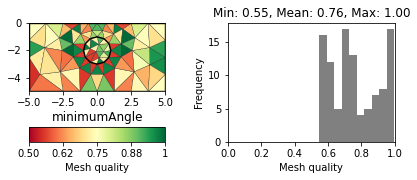

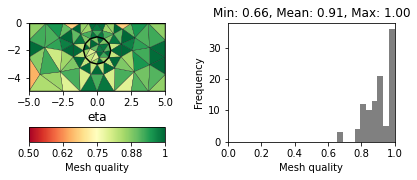

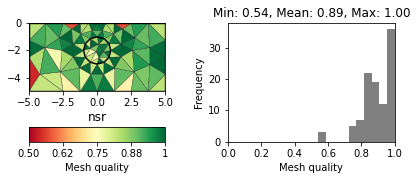

In [6]:
world = plc.createWorld(start=[-5, 0], end=[5, -5], marker=1,
                        worldMarker=False, area=2.)
c1 = plc.createCircle(pos=[0.0, -2.0], radius=1.0, area=.3)
mesh = pg.meshtools.createMesh([world, c1])

for measure in "minimumAngle", "eta", "nsr":
    showQuality(mesh, quality(mesh, measure))
    plt.title(measure)

plt.show()

(<AxesSubplot:>, None)

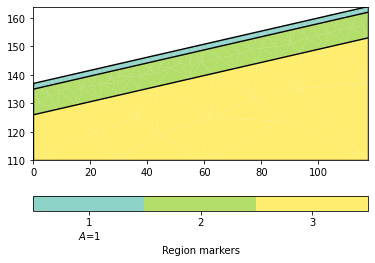

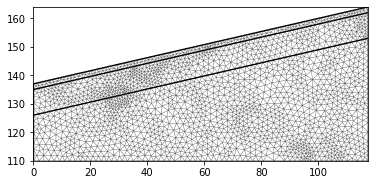

In [7]:
layer1 = mt.createPolygon([[0.0, 137], [117.5, 164], [117.5, 162], [0.0, 135]],
                          isClosed=True, marker=1, area=1)
layer2 = mt.createPolygon([[0.0, 126], [0.0, 135], [117.5, 162], [117.5, 153]],
                          isClosed=True, marker=2)
layer3 = mt.createPolygon([[0.0, 110], [0.0, 126], [117.5, 153], [117.5, 110]],
                          isClosed=True, marker=3)

slope = (164 - 137) / 117.5

geom = layer1 + layer2 + layer3

# If you want no sloped flat earth geometry .. comment out the next 2 lines
# geom = mt.createWorld(start=[0.0, 110], end=[117.5, 137], layers=[137-2, 137-11])
# slope = 0.0

pg.show(geom)

mesh = mt.createMesh(geom, quality=34.3, area=3, smooth=[1, 10])
pg.show(mesh)

(<AxesSubplot:>, None)

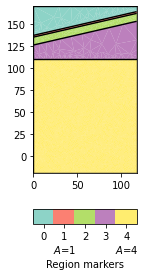

In [8]:
layer0 = mt.createPolygon([[0.0, 170], [117.5, 170], [117.5, 162], [0.0, 135]],
                          isClosed=True, marker=0, area=0)
layer1 = mt.createPolygon([[0.0, 137], [117.5, 164], [117.5, 162], [0.0, 135]],
                          isClosed=True, marker=1, area=1)
layer2 = mt.createPolygon([[0.0, 126], [0.0, 135], [117.5, 162], [117.5, 153]],
                          isClosed=True, marker=2)
layer3 = mt.createPolygon([[0.0, 110], [0.0, 126], [117.5, 153], [117.5, 110]],
                          isClosed=True, marker=3)
layer4 = mt.createPolygon([[0.0,-20],[117.5,-20],[117.5,110],[0.0,110]],
                            isClosed=True, marker=4, area=4)

slope = (164 - 137) / 117.5

geom = layer0 + layer1 + layer2 + layer3 + layer4

# If you want no sloped flat earth geometry .. comment out the next 2 lines
# geom = mt.createWorld(start=[0.0, 110], end=[117.5, 137], layers=[137-2, 137-11])
# slope = 0.0

pg.show(geom)

(<AxesSubplot:>, None)

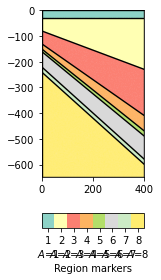

In [9]:
west_edge = 0
east_edge = 400

topo_w = 0
topo_e = 0

glac_base_w = topo_w - 30
glac_base_e = topo_e - 30

sher_base_w = glac_base_w - 50
sher_base_e = glac_base_e - 200

# u_perm_thickness = 
uperm_base_w = sher_base_w - 50
uperm_base_e = sher_base_e - 180
umag_base_w = uperm_base_w - 20
umag_base_e = uperm_base_e - 60
m_perm_base_w = umag_base_w - 10
m_perm_base_e = umag_base_e - 20
l_perm_base_w = m_perm_base_w - 60
l_perm_base_e = m_perm_base_e - 90
basal_perm_sands_base_w = l_perm_base_w - 20
basal_perm_sands_base_e = l_perm_base_e - 20
base_model = basal_perm_sands_base_e - 50


glac = mt.createPolygon([[west_edge,topo_w],[west_edge,glac_base_w],[east_edge,glac_base_e],[east_edge,topo_e]],
                        isClosed=True, marker=1, area=1)
sher = mt.createPolygon([[west_edge,glac_base_w],[west_edge,sher_base_w],[east_edge,sher_base_e],[east_edge,glac_base_e]],
                        isClosed=True, marker=2, area=2)
uperm = mt.createPolygon([[west_edge,sher_base_w],[west_edge,uperm_base_w],[east_edge,uperm_base_e],[east_edge,sher_base_e]],
                        isClosed=True, marker=3, area=3)
umag = mt.createPolygon([[west_edge,uperm_base_w],[west_edge,umag_base_w],[east_edge,umag_base_e],[east_edge,uperm_base_e]],
                        isClosed=True, marker=4, area=4)
m_perm = mt.createPolygon([[west_edge,umag_base_w],[west_edge,m_perm_base_w],[east_edge,m_perm_base_e],[east_edge,umag_base_e]],
                        isClosed=True, marker=5, area=5)
l_perm = mt.createPolygon([[west_edge,m_perm_base_w],[west_edge,l_perm_base_w],[east_edge,l_perm_base_e],[east_edge,m_perm_base_e]],
                        isClosed=True, marker=6, area=6)
basal_perm = mt.createPolygon([[west_edge,l_perm_base_w],[west_edge,basal_perm_sands_base_w],[east_edge,basal_perm_sands_base_e],[east_edge,l_perm_base_e]],
                        isClosed=True, marker=7, area=7)
base_model = mt.createPolygon([[west_edge,basal_perm_sands_base_w],[west_edge,base_model],[east_edge,base_model],[east_edge,basal_perm_sands_base_e]],
                        isClosed=True, marker=8, area=8)



my_geom = glac + sher + uperm + umag + m_perm + l_perm + basal_perm + base_model

pg.show(my_geom, boundaryMarker=True)

Add markerPosition command to kwargs of createPolygon, place a marker in each polygon      

Signature:
mt.createPolygon(
    verts,
    isClosed=False,
    addNodes=0,
    interpolate='linear',
    **kwargs,
)
Source:   
def createPolygon(verts, isClosed=False, addNodes=0, interpolate='linear',
                  **kwargs):
    """Create a polygon from a list of vertices.

    All vertices need to be unique and duplicate vertices will be ignored.
    If you want the polygon be a closed region you can set the 'isClosed' flag.
    Closed region can be attributed by assigning a region marker.
    The automatic region marker is placed in the center of all vertices.

    Parameters
    ----------
    verts : []
        * List of x y pairs [[x0, y0], ... ,[xN, yN]]

    isClosed : bool [True]
        Add closing edge between last and first node.

    addNodes : int [1], iterable
        Constant or (for each) Number of additional nodes to be added,
        equidistant between sensors.

    interpolate : str ['linear']
        Interpolation rule for addNodes. 'linear' or 'spline'. TO

(<AxesSubplot:>, None)

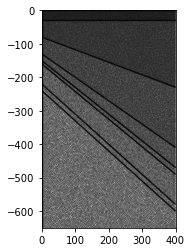

In [10]:
my_mesh = mt.createMesh(my_geom, quality=10, area=2000, smooth=True)
pg.show(my_mesh)

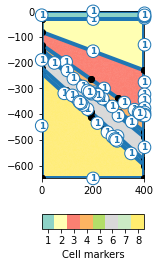

In [11]:
my_mesh = mt.createMesh(my_geom, quality=33.5, area=200, smooth=True)
_ = pg.viewer.showMesh(my_mesh, markers=True)

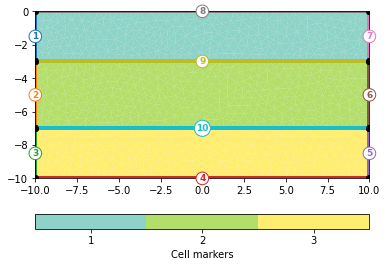

In [12]:
import pygimli as pg
import pygimli.meshtools as mt
world = mt.createWorld(start=[-10, 0], end=[10, -10],
                       layers=[-3, -7], worldMarker=False)
mesh3 = mt.createMesh(world, quality=32, area=0.2, smooth=[1, 10])
_ = pg.viewer.showMesh(mesh3, markers=True)

In [13]:
west_edge = 0
east_edge = 400

topo_w = 0
topo_e = 0

glac_base_w = topo_w - 30
glac_base_e = topo_e - 30

sher_base_w = glac_base_w - 50
sher_base_e = glac_base_e - 200

# u_perm_thickness = 
uperm_base_w = sher_base_w - 50
uperm_base_e = sher_base_e - 180
umag_base_w = uperm_base_w - 20
umag_base_e = uperm_base_e - 60
m_perm_base_w = umag_base_w - 10
m_perm_base_e = umag_base_e - 20
l_perm_base_w = m_perm_base_w - 60
l_perm_base_e = m_perm_base_e - 90
basal_perm_sands_base_w = l_perm_base_w - 20
basal_perm_sands_base_e = l_perm_base_e - 20
base_model = basal_perm_sands_base_e - 50


(<AxesSubplot:>, None)

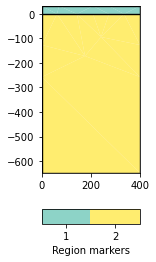

In [15]:
world2 = mt.createWorld(start=[west_edge, topo_w], end=[east_edge, base_model], layers=[30])
pg.show(world2)

(<AxesSubplot:>, None)

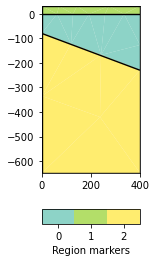

In [22]:


# glac2 = mt.createLine(start=[west_edge, glac_base_w], end=[east_edge, glac_base_e])
sher2 = mt.createLine(start=[west_edge, sher_base_w], end=[east_edge, sher_base_e])
uperm2 = mt.createLine(start=[west_edge, uperm_base_w], end=[east_edge, uperm_base_e])
umag2 = mt.createLine(start=[west_edge, umag_base_w], end=[east_edge, umag_base_e])
m_perm2 = mt.createLine(start=[west_edge, m_perm_base_w], end=[east_edge, m_perm_base_e])
l_perm2 = mt.createLine(start=[west_edge, l_perm_base_w], end=[east_edge, l_perm_base_e])
basal_perm2 = mt.createLine(start=[west_edge, basal_perm_sands_base_w], end=[east_edge, basal_perm_sands_base_e])

model_ln = world2 + sher2 #+ uperm2 + umag2 + m_perm2 + l_perm2 + basal_perm2

pg.show(model_ln)

(<AxesSubplot:>, None)

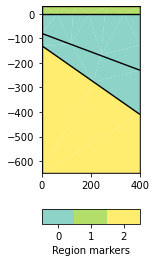

In [23]:
model_ln += uperm2

pg.show(model_ln)

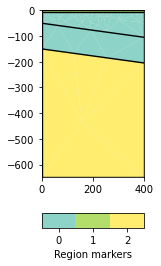

In [32]:
# dimensions of the world
left = 0
right = 400
depth = 650

world = mt.createWorld(start=[left, 0],
                       end=[right, -depth],
                       layers=[-5])
#print(world)

line = mt.createLine(start=[left, -50], end=[right, -105])
line2 = mt.createLine(start=[left, -150], end=[right, -205])
#pg.show(line);

geometry = world + line
geometry += line2
pg.show(geometry);

In [39]:
for nr, marker in enumerate(geometry.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())



Position marker number 1: 0.2 -4.8 0.0
Position marker number 2: 0.2 -649.8 0.0


In [ ]:
# Boundary Conditions

# neumann - specifies the normal derivative of a function

# neumannBC = {3: 0,  # left
#              2: 0}  # right

# dirichlet - specifies the value of a function
dirichletBC = {4: 15.0,             # top
               1: lambda boundary: 3.0 + boundary.center()[1]}             # bottom

# dirichletBC = {4: 45.0}


T = pg.solver.solveFiniteElements(mesh,
                                  a={1: 1.0,
                                        2: 2.0,
                                        3: 3.0,
                                        4: 5.1,
                                        5: 5.1,
                                        6: 5.1,
                                        7: 5.1,
                                        8: 5.1
                                        },
                                  # bc = {'Neumann': {1: 1.0, 2:4.0}}, verbose=True)
                                  # bc={'Dirichlet': dirichletBC, 'Neumann': neumannBC}, verbose=True)
                                  bc = {'Dirichlet': dirichletBC}, verbose=True)
                                  # bc={'Neumann': neumannBC, 'Dirichlet': dirichletBC}, verbose=True)

ax, _ = pg.show(mesh, data=T, label='Temperature $T$', cMap="hot_r")
pg.show(geom, ax=ax, fillRegion=False)

In [ ]:
mesh.boundaryMarkers

In [ ]:
world = mt.createWorld(start=[-20, 0], end=[20, -16], layers=[-2, -8],
                       worldMarker=False)
# Create a heterogeneous block
block = mt.createRectangle(start=[-6, -3.5], end=[6, -6.0],
                           marker=4,  boundaryMarker=10, area=0.1)
# Merge geometrical entities
geom2 = world + block
pg.show(geom2, boundaryMarker=True)

mesh1 = mt.createMesh(geom2, quality=33, area=0.2, smooth=[1, 10])
pg.show(mesh1)

T = pg.solver.solveFiniteElements(mesh1,
                                  a={1: 1.0, 2: 2.0, 3: 3.0, 4:0.1},
                                  bc={'Dirichlet': {8: 1.0, 4: 0.0}}, verbose=True)

ax, _ = pg.show(mesh1, data=T, label='Temperature $T$', cMap="hot_r")
pg.show(geom2, ax=ax, fillRegion=False)


In [ ]:
pg.viewer.showMesh(mesh1, markers=True)

# Boundary markers tutorial

(<AxesSubplot:>, None)

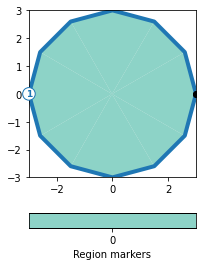

In [49]:
circle_outer = mt.createCircle(pos=[0.0, 0.0], radius=3.0, marker=0)

pg.show(circle_outer, markers=True)


(<AxesSubplot:>, None)

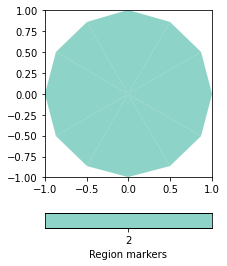

In [51]:
circle_inner = mt.createCircle(
    pos=[0.0, 0.0],
    radius=1.0,
    # area=0.3,
    marker=2,
    boundaryMarker=0)

pg.show(circle_inner, markers=True)


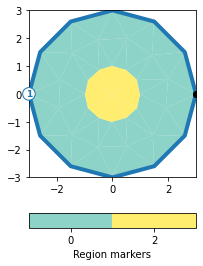

In [52]:
plc = circle_outer + circle_inner

ax, cb = pg.show(plc, markers=True)

In [54]:
fig = ax.get_figure()
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())
    ax.scatter(marker.x(), marker.y(), s=(2 - nr) * 30, color='k')
ax.set_title('marker positions - non-working example')
plt.show()

Position marker number 1: 2.999 0.0 0.0
Position marker number 2: 0.999 9.251858538542971e-21 0.0


Position marker number 1: 2.95 0.0 0.0
Position marker number 2: 0.95 0.0 0.0


C:\Users\simold\AppData\Local\Temp\ipykernel_25032\3122277391.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


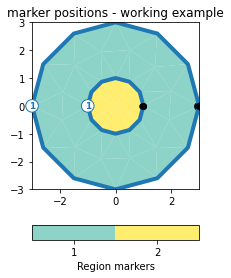

In [55]:
circle_outer = mt.createCircle(
    pos=[0.0, 0.0],
    radius=3.0,
    marker=1,
    markerPosition=[2.95, 0.0],
)

circle_inner = mt.createCircle(
    pos=[0.0, 0.0],
    radius=1.0,
    marker=2,
    markerPosition=[0.95, 0.0],
)

plc = circle_outer + circle_inner

ax, cb = pg.show(plc, markers=True)

fig = ax.get_figure()
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())
    ax.scatter(marker.x(), marker.y(), s=(2 - nr) * 30, color='k')
ax.set_title('marker positions - working example')
fig.show()